# Il dataset 04cars
>Il datasete comprende 428 auto del 2004.
Alcune delle variabili nel dataset sono: prezzo di vendità consigliato in dollari, prezzo di listino in dollari,
variabili dummy per la categoria dell'auto (es: SUV, auto sportiva, pickup) e per la grandezza dell'auto, sono presenti anche variabili legate alle caratteristiche tecniche come peso, cilindrata, distanza tra gli assi ecc...
Alcune variabili (es:hp, citympg...) riportano il tipo object e sembrano non avere missing values, questo perchè chi ha raccolto
i dati ha usato il simbolo '*' al posto Nan che viene usato per i missing values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("/home/matthew/Scrivania/uni/MASL/esercizi_python/data/dataset_pca.csv", decimal=",", na_values=['*'])
ds.head()

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18.0,24.0,3880.0,115.0,197.0,72.0
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18.0,24.0,3893.0,115.0,197.0,72.0
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17.0,23.0,4451.0,106.0,189.0,77.0
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17.0,24.0,3153.0,100.0,174.0,71.0
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24.0,31.0,2778.0,101.0,172.0,68.0


In [3]:
ds.info(verbose=True, memory_usage=True)
ds.columns = ds.columns.str.lower()
ds.columns = ds.columns.str.replace(' ', '')
ds.rename(columns ={'enginesize(l)':'enginesize'}, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 20 columns):
Vehicle Name                         428 non-null object
Small/Sporty/ Compact/Large Sedan    428 non-null int64
Sports Car                           428 non-null int64
SUV                                  428 non-null int64
Wagon                                428 non-null int64
Minivan                              428 non-null int64
Pickup                               428 non-null int64
AWD                                  428 non-null int64
RWD                                  428 non-null int64
Retail Price                         428 non-null int64
Dealer Cost                          428 non-null int64
Engine Size (l)                      428 non-null float64
Cyl                                  428 non-null int64
HP                                   428 non-null int64
City MPG                             414 non-null float64
Hwy MPG                              414 non-null 

# Le caratteristiche medie 
>Ignorando le prime 8 colonne che riguardano le variabili dummy, le medie e le standard daviation
delle variabili Retail Price e Dealer Cost sono molto simili, questo perchè i 2 prezzi sono collegati e avranno
una forte correlazione.


In [4]:
name_var = ds.columns.values
categ_column = ['vehiclename ', 'small/sporty/compact/largesedan','sportscar ', 'suv', 'wagon'
                 , 'minivan', 'pickup', 'awd', 'rwd']
numeric_column = ['retailprice', 'dealercost', 'enginesize', 'cyl', 'hp', 'citympg', 'hwympg'
                  , 'weight', 'wheelbase', 'len', 'width']
ds.describe()

,small/sporty/compact/largesedan,sportscar,suv,wagon,minivan,pickup,awd,rwd,retailprice,dealercost,enginesize,cyl,hp,citympg,hwympg,weight,wheelbase,len,width
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000,400.000000
mean,0.572430,0.114486,0.140187,0.070093,0.046729,0.056075,0.214953,0.257009,32774.855140,30014.700935,3.196729,5.775701,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866,71.292500
std,0.495305,0.318773,0.347587,0.255603,0.211305,0.230335,0.411271,0.437496,19431.716674,17642.117750,1.108595,1.622779,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523,3.393484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10280.000000,9875.000000,1.300000,-1.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000,69.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000,71.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,81.000000


# Gestione dei missing values
Le colonne citympg, hwympg, len, witdh, wheelbase e weight hanno dei missing values,
per gestirli e usare tutti i dati per la PCA, uso la media.

In [5]:
ds.isnull().sum()

vehiclename                         0
small/sporty/compact/largesedan     0
sportscar                           0
suv                                 0
wagon                               0
minivan                             0
pickup                              0
awd                                 0
rwd                                 0
retailprice                         0
dealercost                          0
enginesize                          0
cyl                                 0
hp                                  0
citympg                            14
hwympg                             14
weight                              2
wheelbase                           2
len                                26
width                              28
dtype: int64

In [6]:
ds.fillna(ds.mean(), inplace=True)
ds.isnull().sum()

vehiclename                        0
small/sporty/compact/largesedan    0
sportscar                          0
suv                                0
wagon                              0
minivan                            0
pickup                             0
awd                                0
rwd                                0
retailprice                        0
dealercost                         0
enginesize                         0
cyl                                0
hp                                 0
citympg                            0
hwympg                             0
weight                             0
wheelbase                          0
len                                0
width                              0
dtype: int64

# Analisi della scatter matrix e di correlazione
>Dalla matrice degli scatterplot possiamo osservare che nel dataset
sono presenti molte relazioni tra le varie variabili.
Per esempio avevamo detto che retailprice e dealercost erano correlate tra di loro,
infatti cosi è, tra di loro 2 esiste una relazione lineare quasi perfetta, fatto che viene confermato anche dalla matrice di correlazione.
>Non ci sarebbe bisogno della pca per decide che ci sono delle variabili inutile e che danno informarmazioni ridodanti,
>ma vediamo il suo utilizzo in questo caso.
>


/home/matthew/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


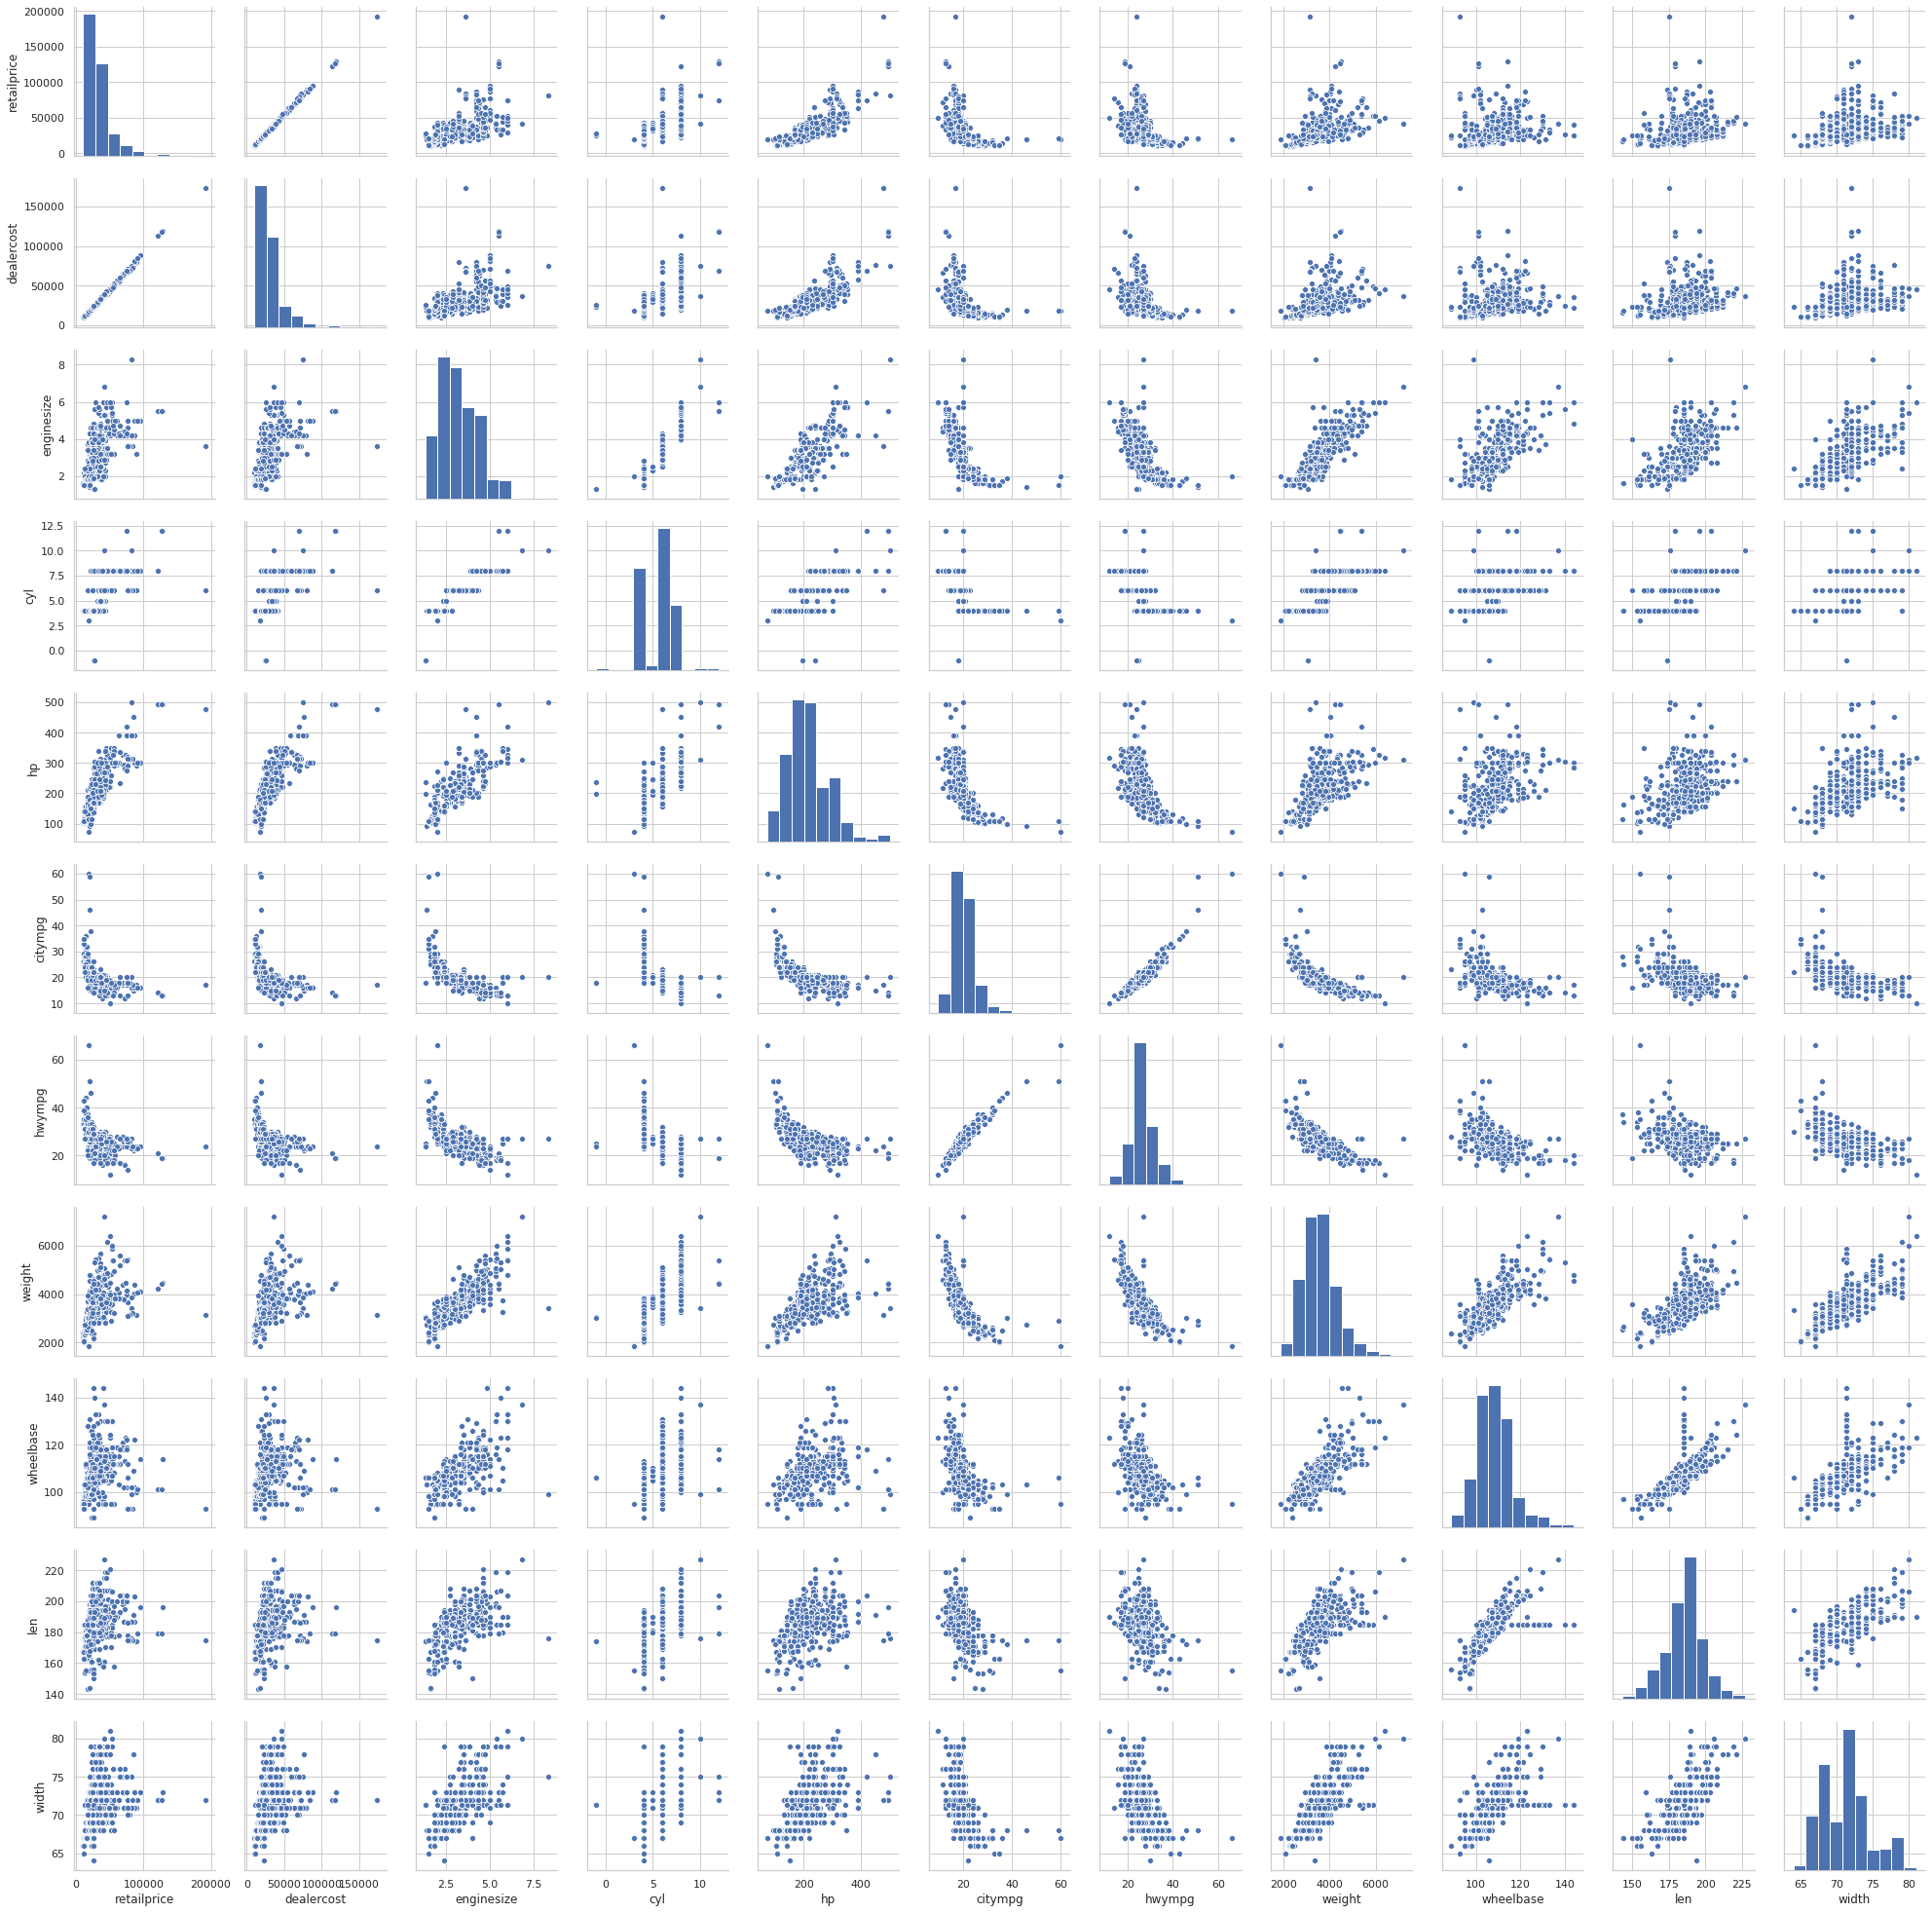

In [7]:
import seaborn as sns
sns.set(style="whitegrid", context='notebook')
sns.pairplot(ds[numeric_column],size= 2.5)
plt.show()

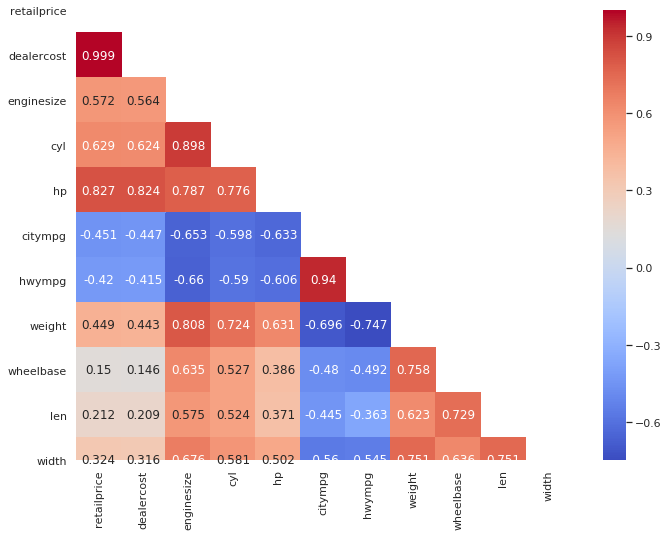

In [8]:
plt.figure(figsize=(11.69,8.27))
corr_matrix = ds[numeric_column].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix,mask= mask, annot= True, fmt ='.3g',square= True,
                     cmap= 'coolwarm')
plt.show()

# Principal component Analysis
>Per scrivere il codice della PCA uso la libreria Scikit-learn che contiene 
la classe StandardScaler che mi consente di standardizzare i dati.

In [9]:
from sklearn.preprocessing import StandardScaler
X = ds[numeric_column].values
sc = StandardScaler()
X_std = sc.fit_transform(X)

Ora ricavo la matrice di covarianza dai dati

In [10]:
cov_mat = np.cov(X_std.T) #devo passare le colonne

>Da essa ricavo gli autovalori e autovettori, che escludendo la variabile che indica 
il nome dell'auto e le variabili dummy, dovrebbero essere 11 autovettori e auto valori per 11 variabili quantitative.

In [11]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Il numero di autovalori(autovettori) è {}".format(len(eigen_vals)))
print("Autovalori: \n",eigen_vals)
print("Autovettori: \n", eigen_vecs)


Il numero di autovalori(autovettori) è 11
Autovalori: 
 [6.85447765e+00 1.85372233e+00 8.96084218e-01 4.51164221e-01
 3.32720602e-01 2.63145960e-01 8.07400183e-04 1.58814134e-01
 9.89846235e-02 7.56714786e-02 4.01685066e-02]
Autovettori: 
 [[ 2.65282865e-01 -4.91793294e-01 -1.71199412e-01 -2.27242612e-01
   1.99553774e-01 -5.47836988e-02  7.09085791e-01  1.75699740e-01
   1.32982302e-01 -1.12378642e-01  2.57733368e-03]
 [ 2.63274860e-01 -4.94555627e-01 -1.72225708e-01 -2.30480043e-01
   2.09858273e-01 -4.58313407e-02 -7.04947586e-01  1.80805457e-01
   1.33526205e-01 -9.79425532e-02  1.06595143e-02]
 [ 3.49730143e-01  1.85434754e-02 -8.80697617e-02  4.39068219e-01
  -2.57111306e-01  8.98838323e-03 -1.18611309e-02 -1.22203103e-01
  -2.76875533e-02 -7.69894199e-01 -4.51974074e-02]
 [ 3.33588294e-01 -7.61882669e-02 -1.44329004e-01  4.93332096e-01
  -3.46280388e-01  2.38893001e-01  4.25902195e-03  3.55025798e-01
   2.57282858e-01  4.98814418e-01  2.55940850e-02]
 [ 3.26346110e-01 -2.9127364

Ora per ogni variabile calcolo la sua varianza spiegata per cercare di capire
il suo contributo informativo nei dati.

In [12]:
tot = np.sum(eigen_vals)
var_exp = [(labda_i/tot) for labda_i in -np.sort(-eigen_vals, kind="mergesort", axis=None)]

Ora faccio un grafico che mostra il potere informativo delle variabili

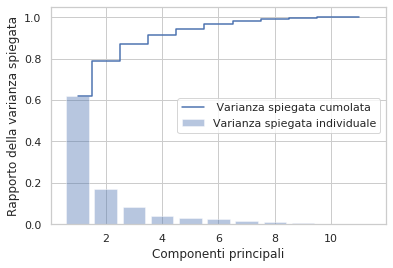

<Figure size 841.68x595.44 with 0 Axes>

In [13]:
cum_var_exp = np.cumsum(var_exp)
plt.bar(np.arange(1,len(eigen_vals)+1), var_exp, alpha =0.4, align = "center", label = "Varianza spiegata individuale")
plt.step(np.arange(1,len(eigen_vals)+1), cum_var_exp, where='mid', label = " Varianza spiegata cumolata")
plt.xlabel("Componenti principali")
plt.ylabel("Rapporto della varianza spiegata")
plt.legend(loc = 'best')
plt.figure(figsize=(11.69,8.27))
plt.show()

# Analisi del grafico ottenuto
>L'algoritmo di PCA ci dice che la prima componente principale spiega da sola più del 60% della varianza
 dei dati, la seconda componente meno del 20%, ma insieme spiegano quasi l' 80% della variabilità
 nei dati, includendo la terza componente si arriva a spiegare il 90% della variabilità nei dati.

In [14]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in np.arange(len(eigen_vals))]
eigen_pair.sort(reverse=True)
B = np.hstack(((eigen_pair[0][1][:, np.newaxis],eigen_pair[1][1][:, np.newaxis]
                , eigen_pair[2][1][:, np.newaxis])))
print("Matrice U:\n",B)

Matrice U:
 [[ 0.26528287 -0.49179329 -0.17119941]
 [ 0.26327486 -0.49455563 -0.17222571]
 [ 0.34973014  0.01854348 -0.08806976]
 [ 0.33358829 -0.07618827 -0.144329  ]
 [ 0.32634611 -0.29127364 -0.05139673]
 [-0.30752413 -0.04203197 -0.56098859]
 [-0.3030854  -0.05275714 -0.61885848]
 [ 0.33963512  0.18434684  0.0556035 ]
 [ 0.26155616  0.40942101 -0.1608032 ]
 [ 0.25309739  0.37205101 -0.38986466]
 [ 0.29319527  0.27925609 -0.17652875]]


In [15]:
X_pca_sdt = X_std.dot(B)


# Visualizzazione del risultato ottenuto attraverso gli scatter plot
Adesso visualizziamo i risultati della nostra compressione dati prima in uno scatter 3D
e poi con una scatter matrix per le coppie in 2D.

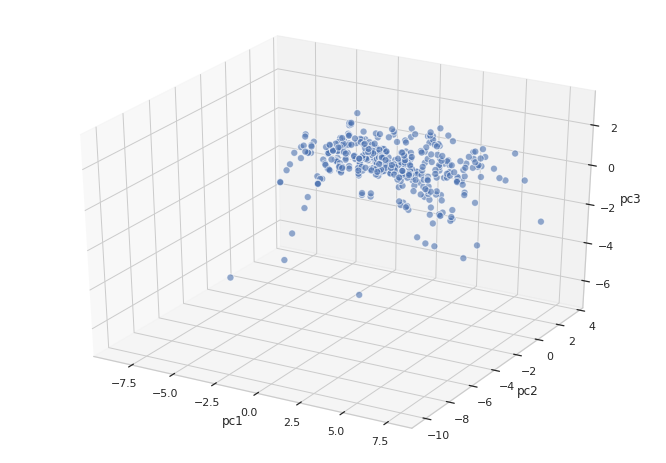

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(11.69,8.27))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_sdt[:,0], X_pca_sdt[:,1], X_pca_sdt[:,2], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.show()


/home/matthew/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


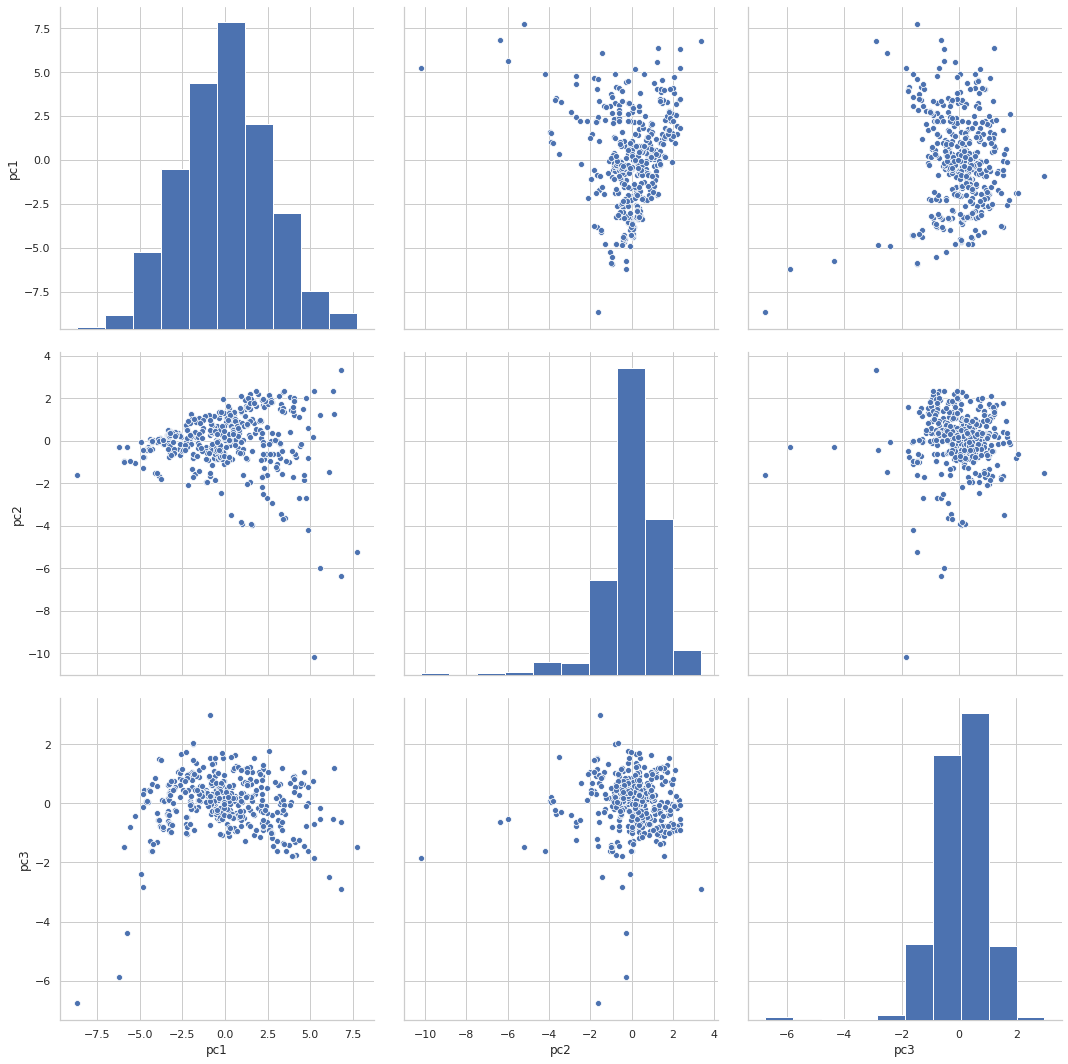

In [17]:
sns.set(style="whitegrid", context='notebook')
sns.pairplot(pd.DataFrame(X_pca_sdt,columns =['pc1', 'pc2', 'pc3']),size= 5)
plt.show()



>Dalla matrice degli scatterplot possiamo vedere che i dati sono più dispersi sull'asse della
PC1 che rispetto gli altri assi, il che è coerrente il grafico della varianza spiegata.


# Versione con scikit-learn
>Adesso per verificare la corretteza dei risultati, provo a riottenere gli
stessi risultati con la versione della PCA di Scikit-learn.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca_sdt_sk = pca.fit_transform(X_std)

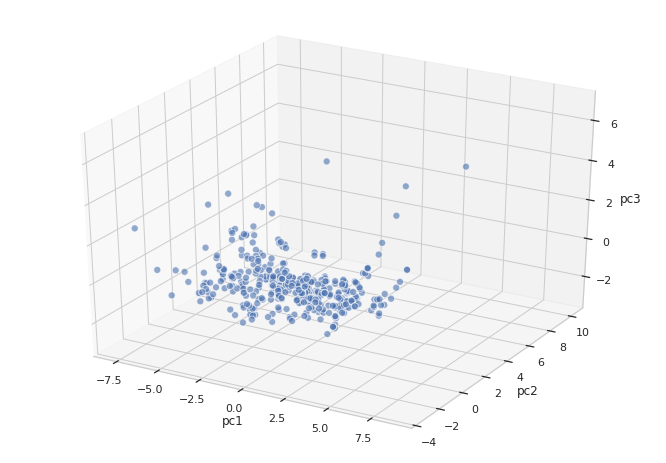

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(11.69,8.27))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_sdt_sk[:,0], X_pca_sdt_sk[:,1], X_pca_sdt_sk[:,2], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.show()


/home/matthew/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


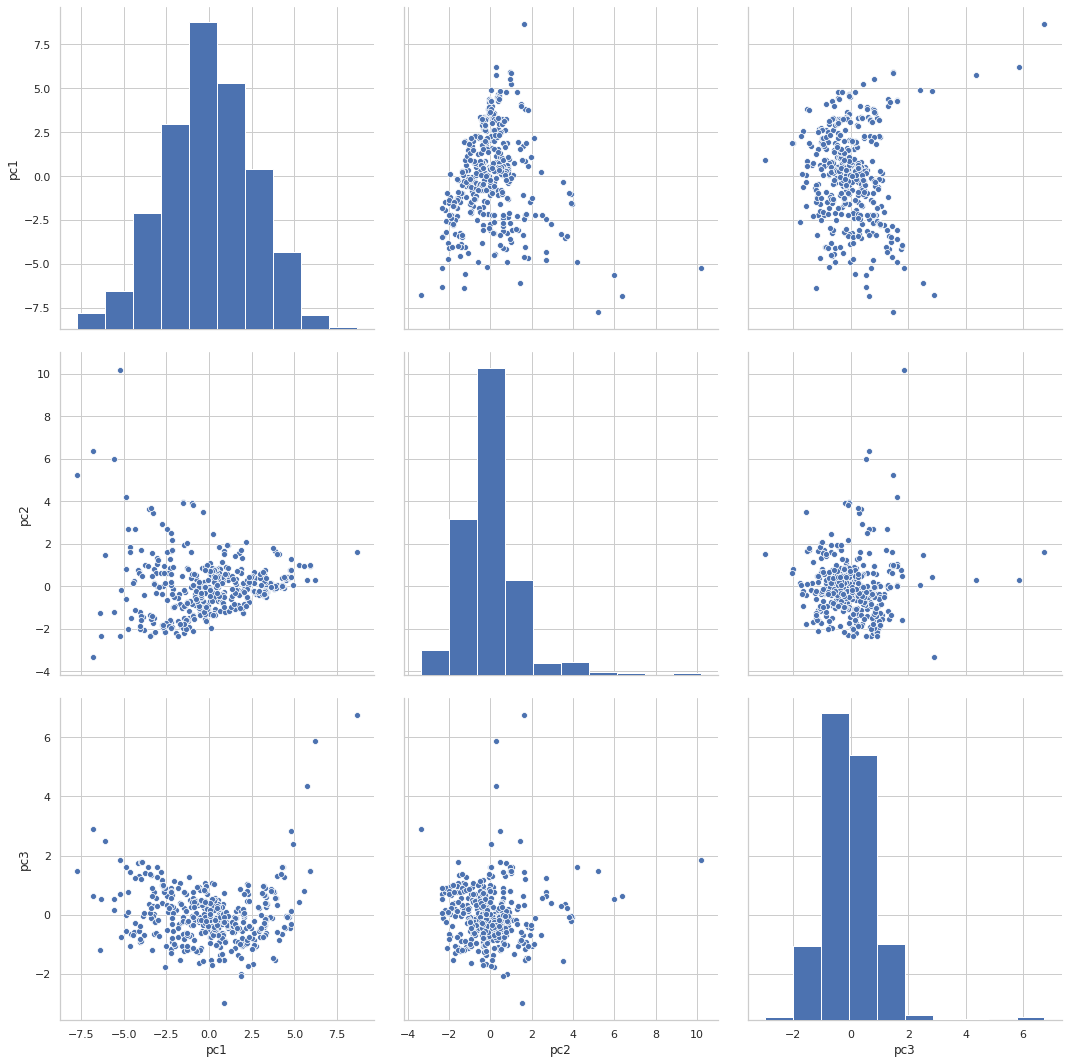

In [20]:
sns.set(style="whitegrid", context='notebook')
sns.pairplot(pd.DataFrame(X_pca_sdt_sk,columns =['pc1', 'pc2', 'pc3']),size= 5)
plt.show()

# PCA senza standardizzazione dei dati
>Vediamo ora il comportamento della PCA senza standardizazzione dei dati.
Ripeto gli stessi passi.

In [21]:
cov_mat = np.cov(X.T) #devo passare le colonne
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Autovalori: \n",eigen_vals)

Autovalori: 
 [6.88658021e+08 4.80719467e+05 2.76864404e+05 1.19532517e+03
 1.10051178e+02 2.31680138e+01 1.76474711e+01 3.00685900e+00
 1.19890407e-01 8.89172819e-01 1.23275860e+00]


In [22]:
tot = np.sum(eigen_vals)
var_exp = [(labda_i/tot) for labda_i in -np.sort(-eigen_vals, kind="mergesort", axis=None)]
print("La varianza totale/la somma degli autovalori è ", tot)

La varianza totale/la somma degli autovalori è  689416956.6894724


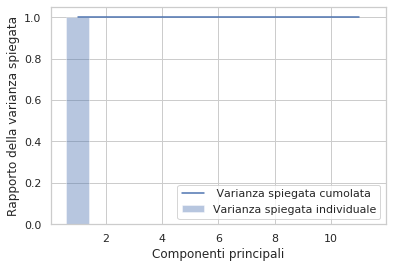

<Figure size 2569.68x1315.44 with 0 Axes>

In [23]:
cum_var_exp = np.cumsum(var_exp)
plt.bar(np.arange(1,len(eigen_vals)+1), var_exp, alpha =0.4, align = "center", label = "Varianza spiegata individuale")
plt.step(np.arange(1,len(eigen_vals)+1), cum_var_exp, where='mid', label = " Varianza spiegata cumolata")
plt.xlabel("Componenti principali")
plt.ylabel("Rapporto della varianza spiegata")
plt.legend(loc = 'best')
plt.figure(figsize=(35.69,18.27))
plt.show()

In [24]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in np.arange(len(eigen_vals))]
eigen_pair.sort(reverse=True)
B = np.hstack(((eigen_pair[0][1][:, np.newaxis],eigen_pair[1][1][:, np.newaxis]
                , eigen_pair[2][1][:, np.newaxis])))
print("Matrice W:\n",B)

Matrice W:
 [[-7.40342676e-01 -1.98472970e-01 -6.42250428e-01]
 [-6.72101689e-01  2.36998708e-01  7.01504271e-01]
 [-2.40289788e-05 -9.89711535e-04  1.61672600e-04]
 [-3.87727886e-05 -1.14480916e-03  2.83216215e-04]
 [-2.26049522e-03 -3.02808329e-02  5.91374788e-03]
 [ 8.77705746e-05  3.99257092e-03 -1.20587393e-03]
 [ 8.92572750e-05  4.93134780e-03 -1.52914595e-03]
 [-1.29189183e-02 -9.50410102e-01  3.08769189e-01]
 [-4.70830662e-05 -8.89120410e-03  3.51116180e-03]
 [-1.03638213e-04 -1.05807914e-02  4.02227011e-03]
 [-4.00580063e-05 -3.20098469e-03  5.96385144e-04]]


In [25]:
X_pca = X.dot(B)

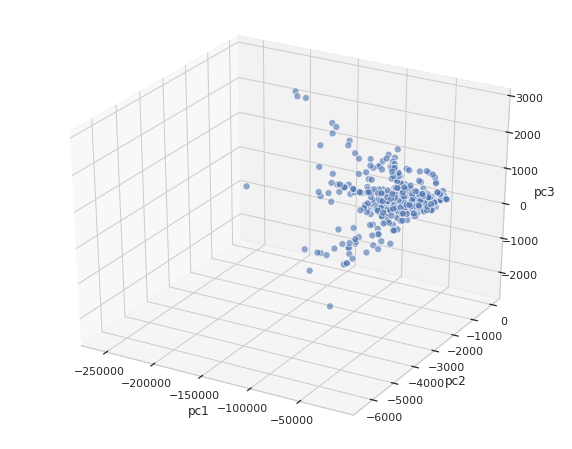

In [26]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()


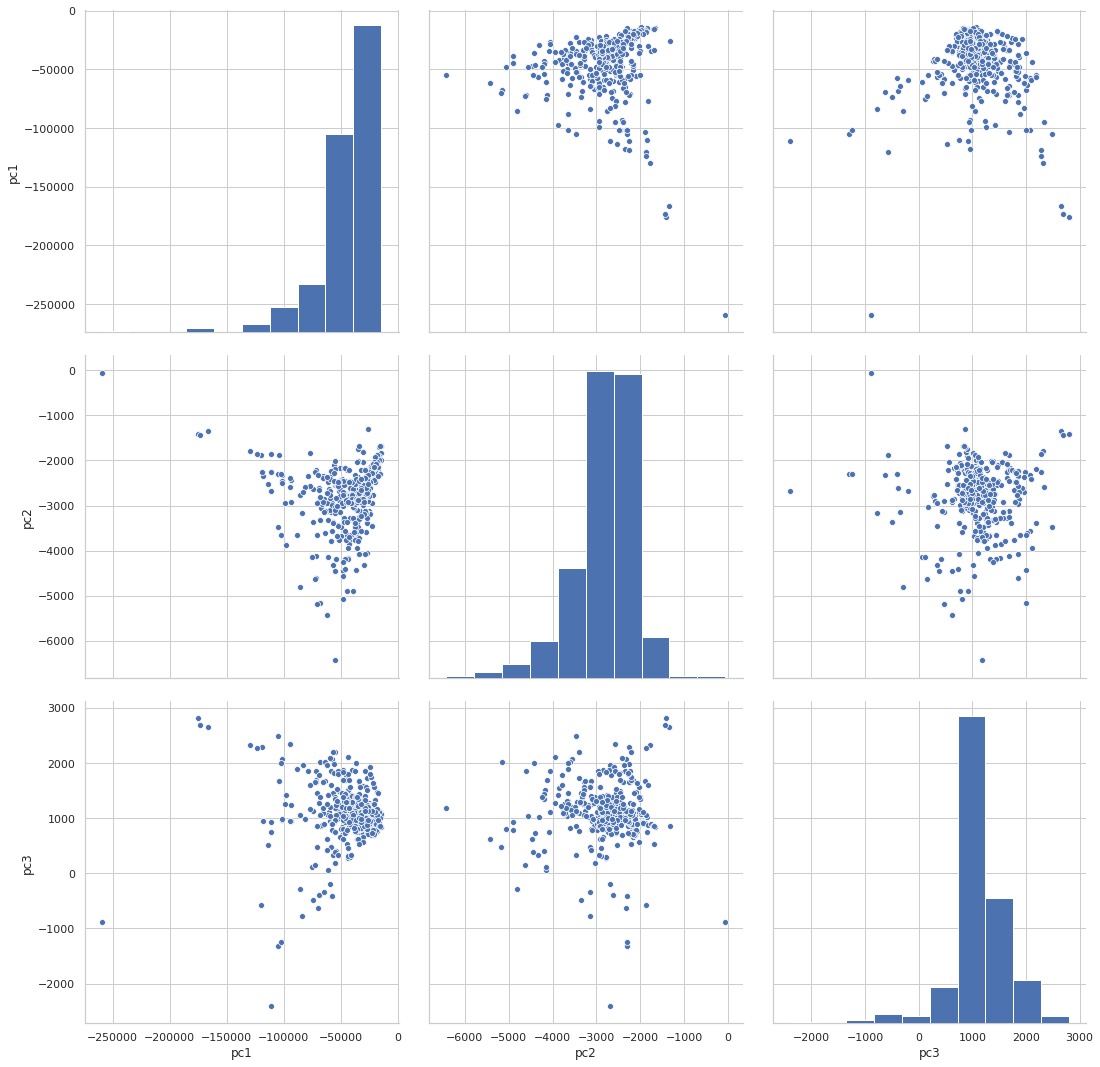

In [27]:
sns.set(style="whitegrid", context='notebook')
sns.pairplot(pd.DataFrame(X_pca, columns =['pc1', 'pc2', 'pc3']),size= 5)
plt.show()


# Conclusioni
>Non standardizzando i dati si ignorano le ipotesi che la pca assume per lavorare (ovvero che
 che il valore atteso della variabile p-variata è 0), pertanto la componente con la varianza più grande assorbe tutta la varianza spiegata
cumulativa, in quanto sarebbe la componente principale che spiega da sola tutta la variablità 
nei dati.<br> Inoltre dal punto di vista della varianza spiegata individuale, le componenti con
l'autovalore più piccolo (e quindi con la varianza più piccola) diventano inifluenti, perchè non
avendo standardizzato i dati, la traccia della matrice di covarianza (la varianza totale) ne risente in quanto viene influenzata dalla componente con la varianza più grande.   
